In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load Pretrained Model
model = MobileNetV2(weights="imagenet")


2025-01-30 08:52:25.003164: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-30 08:52:25.009805: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-30 08:52:25.033003: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738216345.064320    5397 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738216345.076779    5397 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-30 08:52:25.107330: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

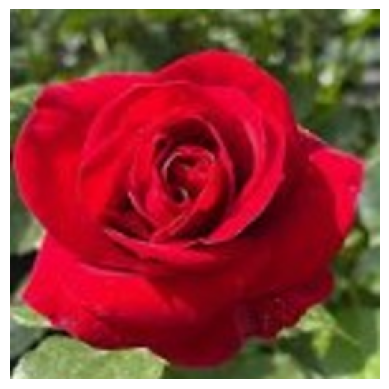

In [2]:
def load_image(image_path):
    img = Image.open(image_path).resize((224, 224))
    plt.imshow(img)
    plt.axis("off")
    plt.show()

    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    return img_array

# Example: Provide the path to an image
image_path = "rose.jpg"
img_array = load_image(image_path)


In [3]:
predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Display Results
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}. {label}: {score:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1. velvet: 0.51
2. sweatshirt: 0.06
3. wool: 0.02


In [20]:
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
import numpy as np
from PIL import Image

# Load Pretrained Model
model = EfficientNetB0(weights="imagenet")

def classify_image(image_path):
    img = Image.open(image_path).resize((224, 224))
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    
    # Make Prediction
    predictions = model.predict(img_array)
    decoded_predictions = decode_predictions(predictions, top=1)[0]  # Get top-1 result
    
    label = decoded_predictions[0][1]  # Get class name
    return label  # Return only the object name

# Example: Provide the path to an image
image_path = "fish.png"
result = classify_image(image_path)
print("Prediction:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Prediction: anemone_fish
